In [1]:
import os
import sys
import time
import numpy as np

from utils.generate_synthetic import simulation, show_synthetic_result
from src.data_class import matrix_class
from src.ICQF import ICQF

### Quick example

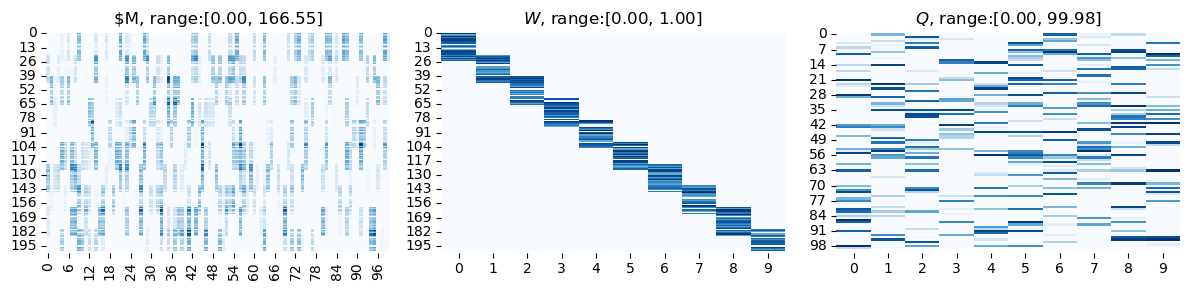

In [2]:
true_W, true_Q, _, M_clean, M, _ = simulation(200, 100, 10)

In [3]:
MF_data = matrix_class(M=M)
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 0.000 --  166.550


In [7]:
clf = ICQF(n_components=10,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100))

In [5]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

factorization time: 0.1142s


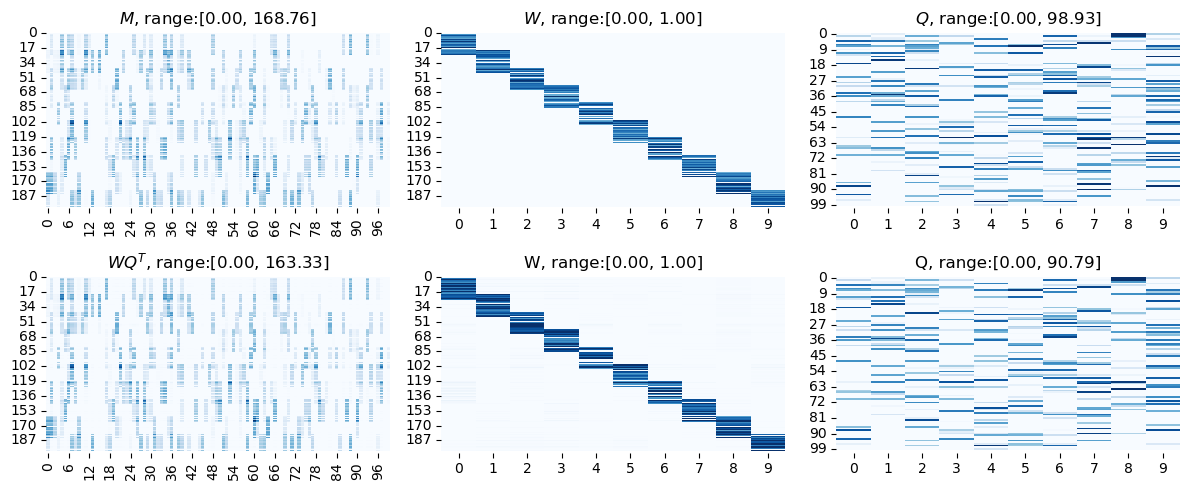

In [6]:
show_synthetic_result(MF_data, true_W, true_Q)

### synthetic example with confounds

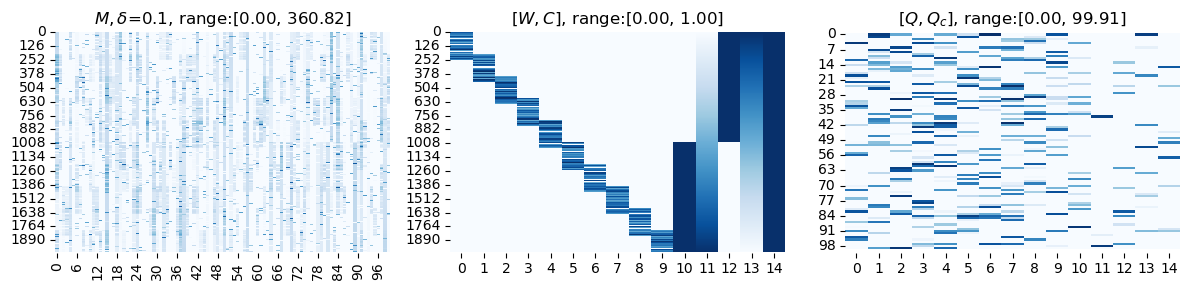

In [7]:
true_W, true_Q, confound_raw, M_clean, M, _ = simulation(2000, 100, 10, 50, density=0.3,
                                                         noise=True, delta=0.1, 
                                                         confound=True,
                                                         visualize=True)

In [8]:
print(np.around(confound_raw,3))

[[0.    0.   ]
 [0.    0.001]
 [0.    0.001]
 ...
 [1.    0.999]
 [1.    0.999]
 [1.    1.   ]]


In [9]:
MF_data = matrix_class(M=M, confound_raw=confound_raw)
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
Make a copy of confound_raw[matrix] as confound[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 84.037 --  360.824


In [10]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.1,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-6, verbose=True)

In [11]:
MF_data, loss = clf.fit_transform(MF_data)

loss=7.710e+07, tol=9.828e-07, time/iter=0.01s (-0.00s,-0.00s,-0.00):  22%|██▏       | 434/2000 [00:04<00:17, 90.88it/s]

Algorithm converged with relative error < 1e-06.


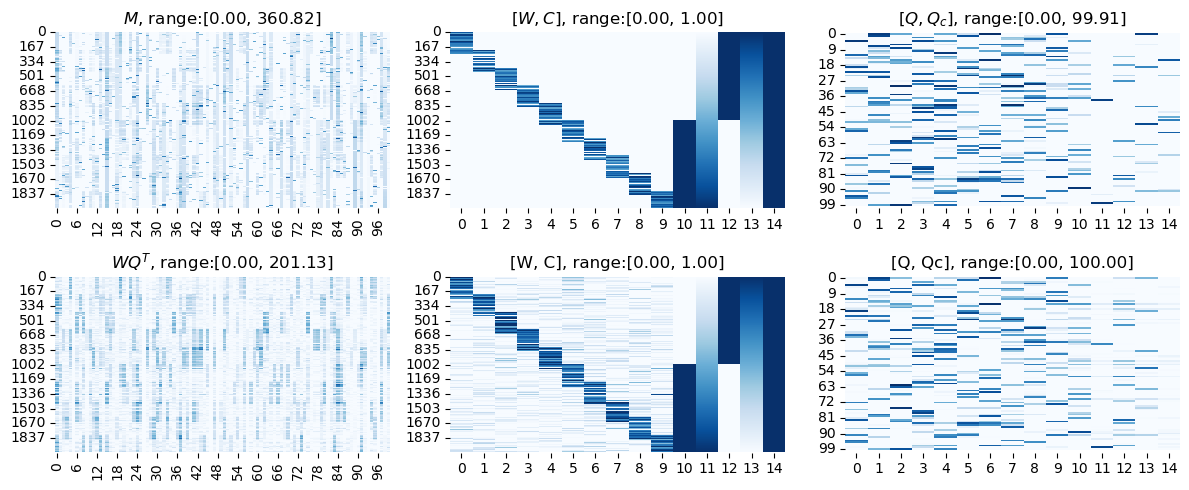

In [12]:
show_synthetic_result(MF_data, true_W, true_Q)

### Synthetic example with missing entries

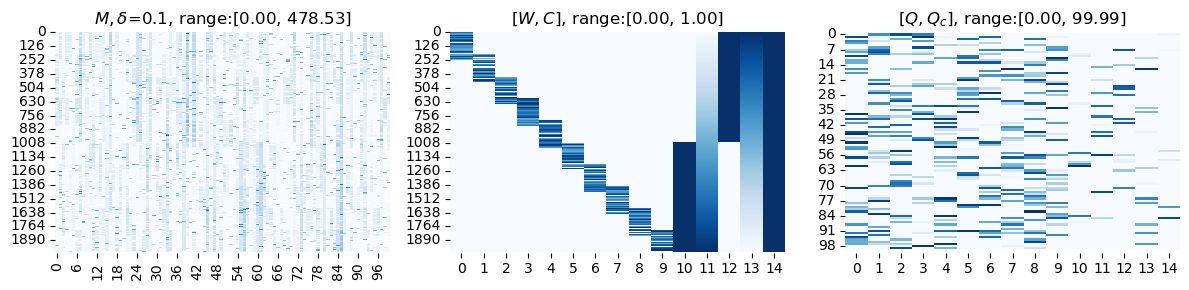

In [13]:
true_W, true_Q, confound_raw, M_clean, M, nan_mask = simulation(2000, 100, 10, 50, 
                                                                density=0.3,
                                                                noise=True, delta=0.1, 
                                                                confound=True,
                                                                missing_ratio=0.05,
                                                                visualize=True)

In [14]:
MF_data = matrix_class(M=M, confound_raw=confound_raw, nan_mask=nan_mask)
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
Make a copy of confound_raw[matrix] as confound[matrix]
[[[Warning]]] Input M[matrix] contains 10086 NaN elements
Map NaN entries to zero in M[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 95.072 --  478.527


In [15]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.1,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-6, verbose=True)

In [16]:
MF_data, loss = clf.fit_transform(MF_data)

loss=1.054e+08, tol=9.840e-07, time/iter=0.01s (-0.00s,-0.00s,-0.00):  17%|█▋        | 333/2000 [00:03<00:17, 92.78it/s]

Algorithm converged with relative error < 1e-06.


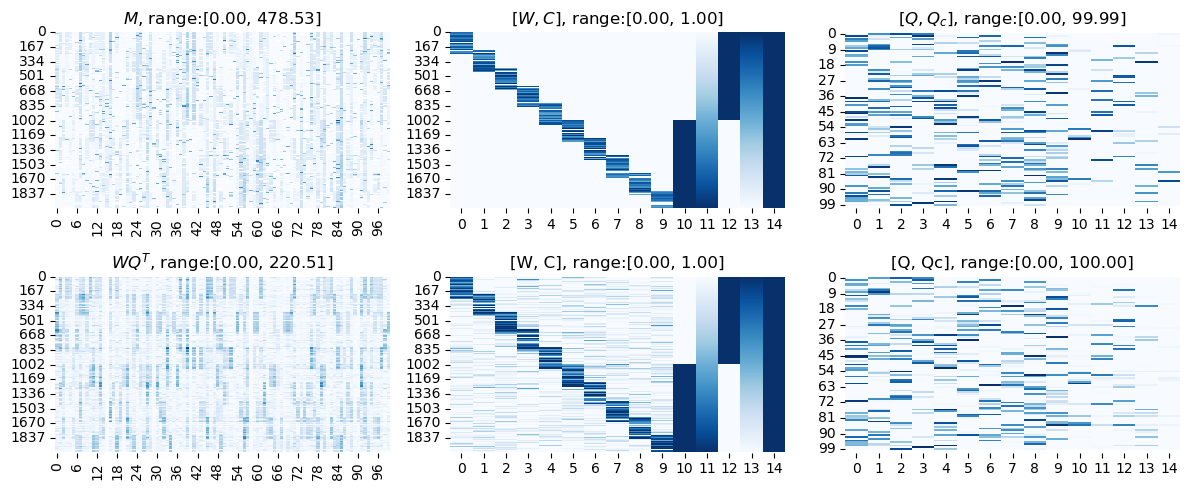

In [17]:
show_synthetic_result(MF_data, true_W, true_Q)

### Detect configuration

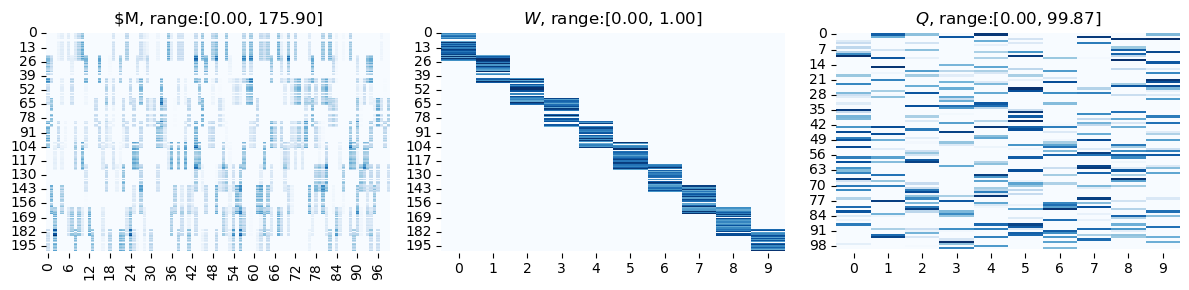

In [8]:
true_W, true_Q, _, M_clean, M, _ = simulation(200, 100, 10)

In [9]:
MF_data = matrix_class(M=M)
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 0.000 --  175.901


In [10]:
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data,repeat=1)

/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 2 - 20 (10)


repeat-[ 1]: config-[16,0.010,0.010], fold-[ 1], :   0%|          | 0/1 [00:10<?, ?it/s]

KeyboardInterrupt



shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 7 - 13


repeat-[ 1]: optimal config-[10,0.001,0.001]: 100%|██████████| 1/1 [00:41<00:00, 41.17s/it]


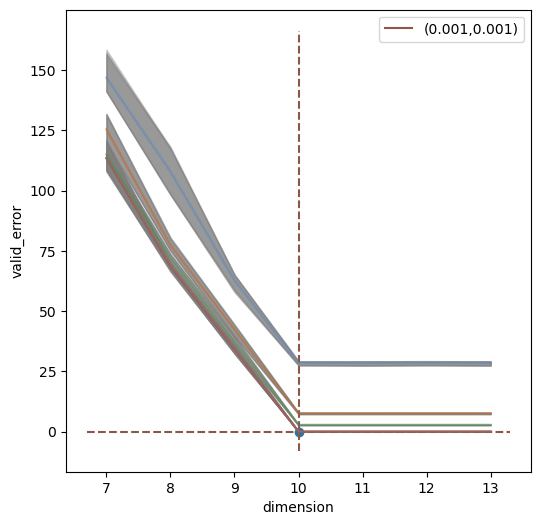

In [20]:
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data,
                                                                      dimension_list=[7,8,9,10,11,12,13],
                                                                      random_fold=False, 
                                                                      repeat=1, 
                                                                      separate_beta=False)

In [36]:
M = np.random.rand(200, 100)
M[M < 0] = 0

In [37]:
MF_data = matrix_class(M=M)
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]


shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 45 - 65 (55)


repeat-[ 1]: optimal config-[46,0.100,0.100]: 100%|██████████| 1/1 [04:12<00:00, 252.97s/it]


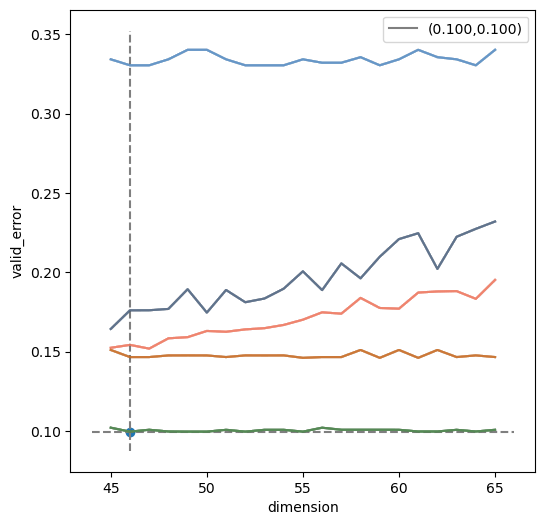

In [38]:
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data,repeat=1, random_fold=True)

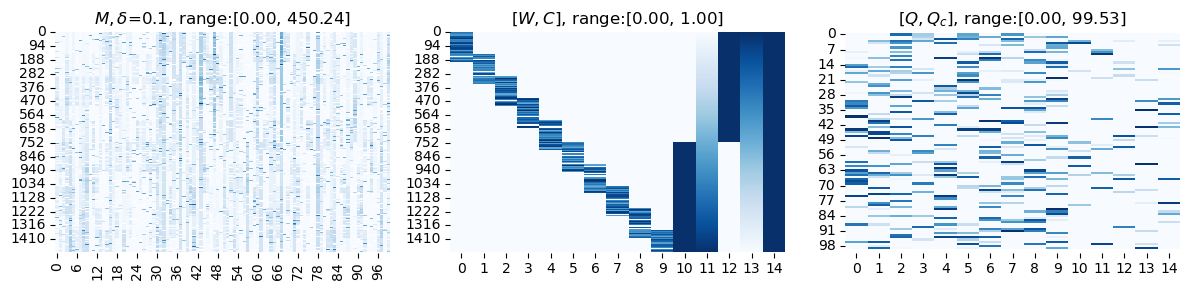

In [26]:
true_W, true_Q, confound_raw, M_clean, M, nan_mask = simulation(1500, 100, 10, 50, 
                                                                density=0.3,
                                                                noise=True, delta=0.1, 
                                                                confound=True,
                                                                missing_ratio=0.05,
                                                                visualize=True)

In [27]:
MF_data = matrix_class(M=M, nan_mask=nan_mask, confound_raw=confound_raw)
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
Make a copy of confound_raw[matrix] as confound[matrix]
[[[Warning]]] Input M[matrix] contains 7493 NaN elements
Map NaN entries to zero in M[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 96.072 --  450.237


In [28]:
clf = ICQF(n_components=10,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(False, 0))

shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 2 - 20 (10)


repeat-[ 1]: optimal config-[10,0.010,0.010]: 100%|██████████| 1/1 [45:29<00:00, 2729.10s/it]


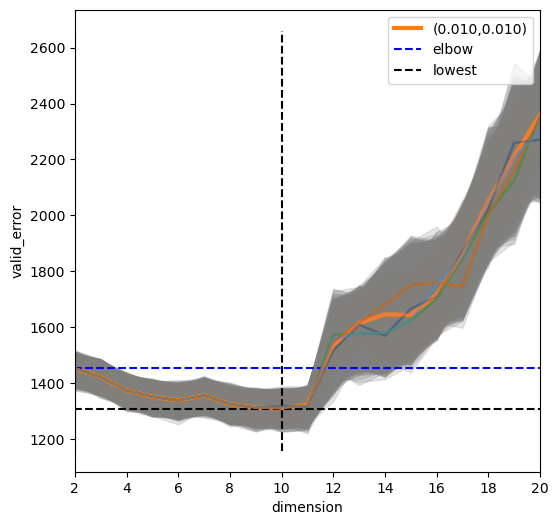

In [31]:
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data,repeat=1, nfold=20, random_fold=False, detection='lowest')

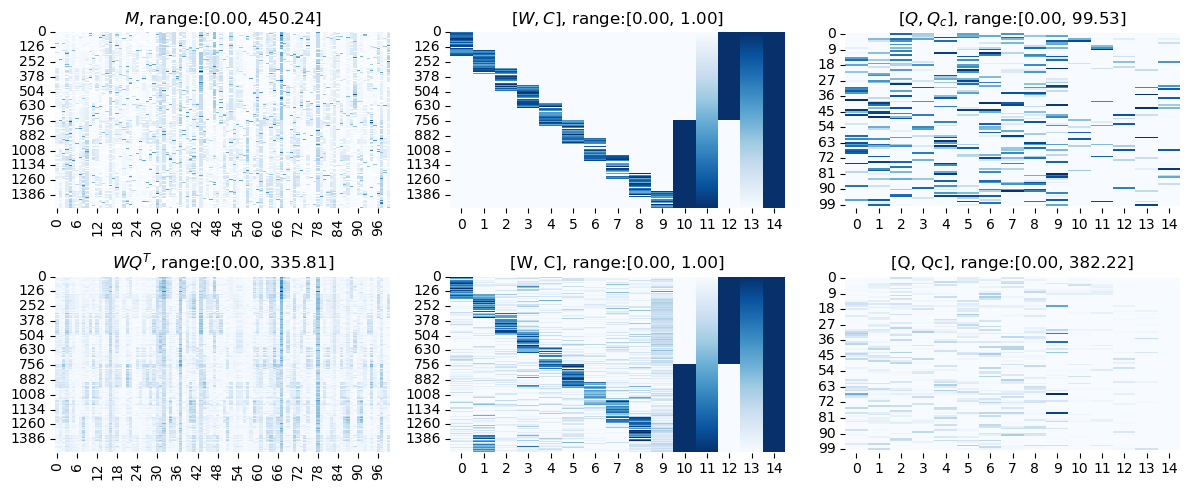

In [34]:
show_synthetic_result(optimal_MF_data, true_W, true_Q)

In [33]:
# embed_stat_pd = embed_stat_list
# avg_stat = embed_stat_pd.groupby(['dimension', 'W_beta', 'Q_beta'])['valid_error'].mean().reset_index()
# optimal_config = avg_stat.loc[avg_stat['valid_error'].idxmin()].values
# optimal_valid_error = optimal_stat.groupby(['dimension'])['valid_error'].mean().reset_index()

# from kneed import KneeLocator

# search_range = optimal_valid_error['dimension'].values
# reconst_err = optimal_valid_error['valid_error'].values
# kn = KneeLocator(search_range, reconst_err, curve='convex', direction='decreasing', online=True, S=0.001, interp_method="polynomial",
#     polynomial_degree=2)
# optimal_config[0] = int(kn.knee)

# from matplotlib import pyplot
# pyplot.plot(search_range, reconst_err, linewidth=3)